# Model Creation and Prediction

In this module we are going to create a prective model using KNN algorithm. KNN is Kth nearest neighbor <br>
method to find best method.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('cleaned data.csv')

In [3]:
df.drop(['Unnamed: 0','Name'], axis = 1, inplace = True)
#removed the redundent index

In [4]:
#df = pd.get_dummies(df,prefix=['Fuel_Type','Transmission'])
df.describe()


,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price
count,5909.000000,5.909000e+03,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000
mean,2013.385344,5.870272e+04,1.200542,18.267147,1627.640379,113.827634,5.281604,9.570237
std,3.252403,9.203877e+04,0.453557,4.097684,601.259874,53.436154,0.810749,11.248288
min,1998.000000,1.710000e+02,1.000000,6.400000,624.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.385500e+04,1.000000,15.290000,1198.000000,78.900000,5.000000,3.500000
50%,2014.000000,5.300000e+04,1.000000,18.200000,1495.000000,98.600000,5.000000,5.700000
75%,2016.000000,7.300000e+04,1.000000,21.100000,1991.000000,138.100000,5.000000,10.000000
max,2019.000000,6.500000e+06,4.000000,28.400000,5998.000000,560.000000,10.000000,160.000000


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x = df[['Power','Kilometers_Driven','Engine','Year','Owner_Type','Mileage']]
x.head()

,Power,Kilometers_Driven,Engine,Year,Owner_Type,Mileage
0,126.20,41000,1582.0,2015,1,19.67
1,88.70,46000,1199.0,2011,1,18.20
2,88.76,87000,1248.0,2012,1,20.77
3,140.80,40670,1968.0,2013,2,15.20
4,63.10,86999,1461.0,2013,1,23.08


In [7]:
#y = df.Price.mask( df.Price > 0, df.Price * 100)
y = df['Price']
y.head()

0    12.50
1     4.50
2     6.00
3    17.74
4     3.50
Name: Price, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [9]:
print(X_train.shape, y_train.shape)

(5318, 6) (5318,)


In [10]:
'''
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=55)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
'''

'\nfrom sklearn.neighbors import KNeighborsClassifier\n\nknn = KNeighborsClassifier(n_neighbors=55)\n\nknn.fit(X_train, y_train)\n\ny_pred = knn.predict(X_test)\n'

In [11]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)
Yhat=lm.predict(X_test)

In [12]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
Yhat=lm.predict(X_test)

In [14]:
Yhat[0:5]

array([ 2.90960476, 29.41677953, 23.00523055, 21.55356671, 12.39444271])

In [15]:
y_test[0:5]

1747     5.45
1737    14.12
2031    19.05
2439    28.00
3961     8.30
Name: Price, dtype: float64

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)


The mean square error of price and predicted value is:  35.96564907846884


In [17]:
print('The R-square is: ', lm.score(X_train,y_train))

The R-square is:  0.6797379329988986


In [18]:
%%capture
! pip install seaborn

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


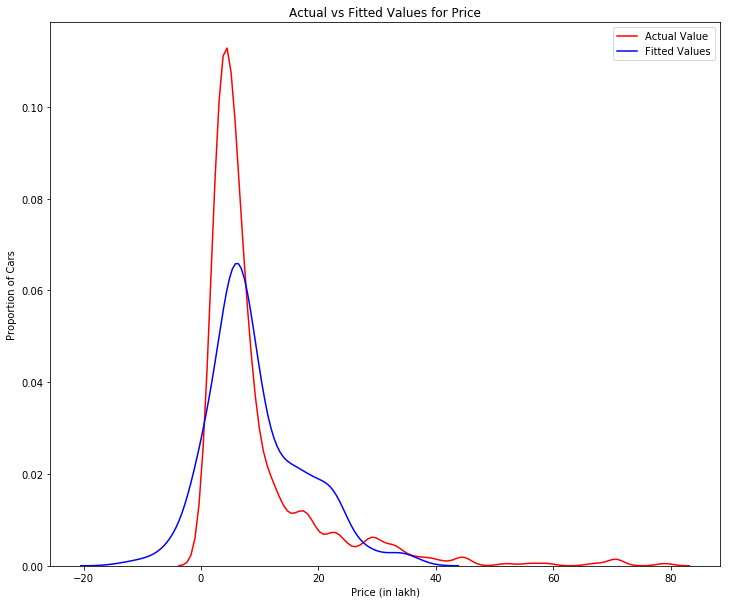

In [20]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in lakh)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
pr=PolynomialFeatures(degree=3)
Z_pr=pr.fit_transform(X_train)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [23]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [24]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [25]:
pipe.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [26]:
Yhat = pipe.predict(X_test)
Yhat[0:5]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([ 3.43099631, 23.11508182, 28.97691898, 26.08796386, 11.8436121 ])

In [27]:
y_test[0:5]

1747     5.45
1737    14.12
2031    19.05
2439    28.00
3961     8.30
Name: Price, dtype: float64

In [28]:
print('The R-square is: ', pipe.score(X_train,y_train))

The R-square is:  0.8053871495004944


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [29]:
mse = mean_squared_error(y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  19.821859987218577


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


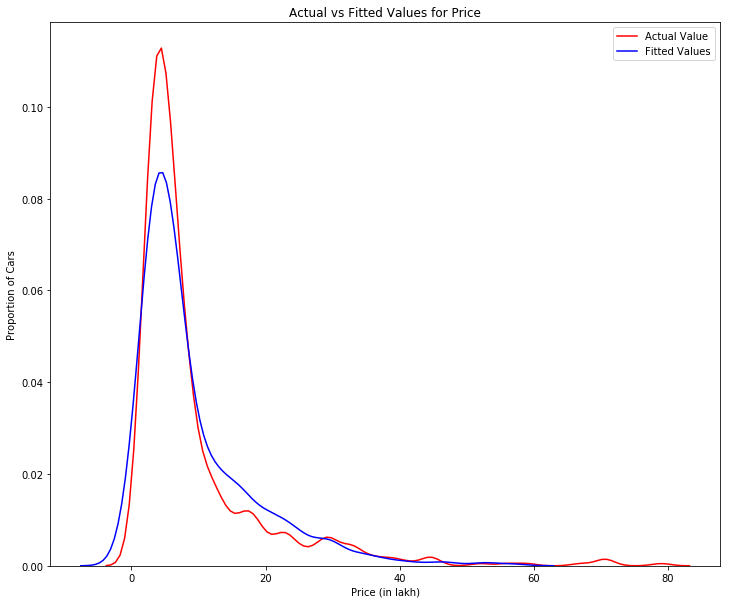

In [30]:
plt.figure(figsize=(12, 10))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in lakh)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [31]:
print(metrics.mean_absolute_error(y_test, Yhat))

2.664426109086787


In [32]:

print(np.sqrt(metrics.mean_squared_error(y_test, Yhat)))

4.452174748054997


In [ ]:
engine = int(input('Enter Engine capacity:'))
power = int(input('Enter HorsePower:'))
kilo = int(input('Kilometers Driven:'))
year = int(input('Year of Registration:'))
owner = int(input("Owner type:hint first-1 second-2 third-3:"))
mileage = int(input('Mileage:'))

In [40]:
Cars = {
        'Power': power,
        'Kilometers_Driven' : kilo,
        'Engine': engine,
        'Year' : year,
        'Owner_Type' : owner,
        'Mileage' : mileage
        }

In [41]:
Car = pd.DataFrame([Cars],columns=['Power','Kilometers_Driven','Engine','Year','Owner_Type','Mileage'])

In [36]:
print(Car)

   Power  Kilometers_Driven  Engine  Year  Owner_Type  Mileage
0    100             100000    1600  2015           2       15


In [37]:
price = pipe.predict(Car)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [42]:
print('Your car worth ', round(price[0],3),' in lakh')

Your car worth  5.917  in lakh
